### Importing libraries and dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Load the csv file
df = pd.read_csv('train.csv')

In [3]:
# View the first five rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the dimensions
print("The shape of the data is", df.shape)

The shape of the data is (1460, 81)


#### The following categorical columns have one level NA, which might be erroneously considered as missing value by pandas:-
'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'MasVnrType', 'PoolQC', 'Fence', 'Electrical', 'MiscFeature'

In [5]:
sel_columns = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'MasVnrType', 'PoolQC', 'Fence', 'Electrical', 'MiscFeature']

In [6]:
# Replacing all 'NA' of all above mentioned columns by 'None'
df[sel_columns] = df[sel_columns].fillna("None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [7]:
# Checking whether the value were correctly replaced for the selected columns
df[sel_columns].isna().sum().sort_values(ascending = False)/len(df)*100

Alley           0.0
GarageQual      0.0
Electrical      0.0
Fence           0.0
PoolQC          0.0
MasVnrType      0.0
GarageYrBlt     0.0
GarageCond      0.0
GarageFinish    0.0
BsmtQual        0.0
GarageType      0.0
FireplaceQu     0.0
BsmtFinType2    0.0
BsmtFinType1    0.0
BsmtExposure    0.0
BsmtCond        0.0
MiscFeature     0.0
dtype: float64

In [8]:
# Check the info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Looking at the data types of all columns and comparing them with the data description of each columns, we deduce that the types of following columns have to be changed:

- Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
- Column LotFrontage and MasVnrArea needs to be converted to numeric type. 

In [9]:
# Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [10]:
# Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [11]:
# Check whether datatype conversion worked
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [12]:
# View the description of the required columns
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


####  The mean of some variables like MasVnrArea and 2ndFlrSF are very different from their median values, so they have skewed distributions.

# Data Exploration 

### Univariate Analysis

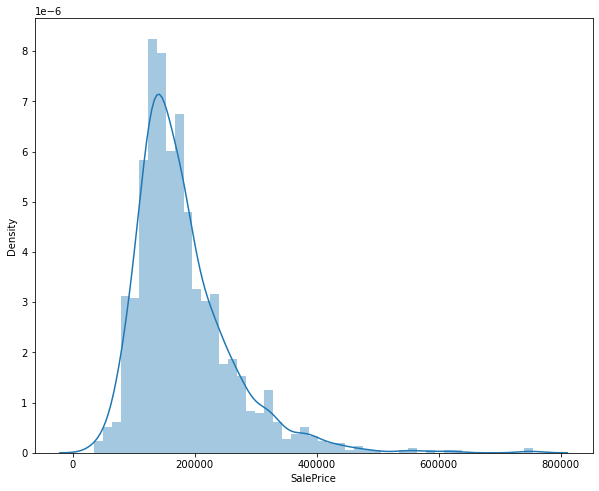

In [13]:
# Distribution of our target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

#### The target variable is slightly skewed

#### We can log transform our target variable to normalize the skew

In [14]:
# Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

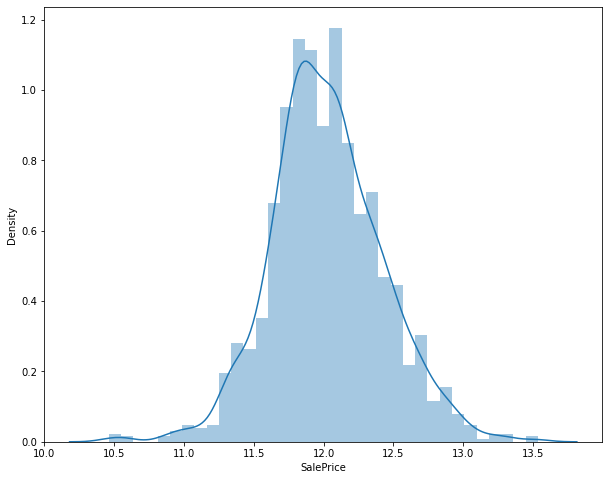

In [15]:
# Plot the spread of transformed target variable
plt.figure(figsize=[10,8])
sns.distplot(df['SalePrice']);

#### Our target variable has normal distribution now.

In [16]:
## Dividing the data into numerical and categorical columns for EDA

# Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
# Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

## EDA on Numerical Columns

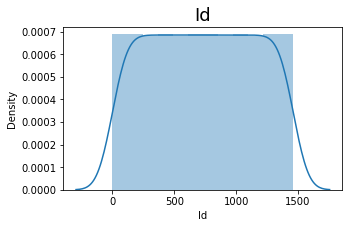

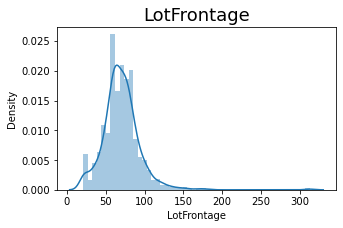

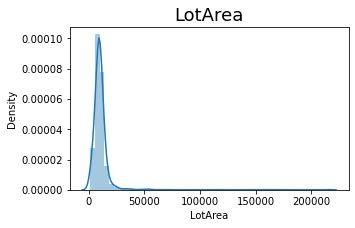

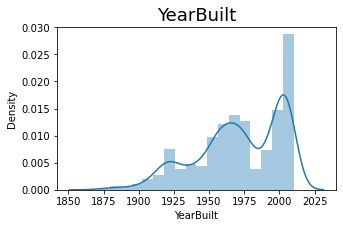

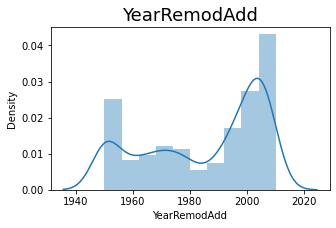

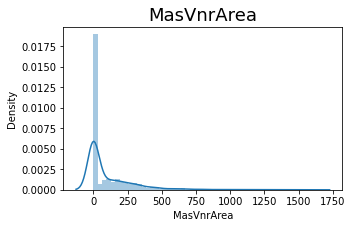

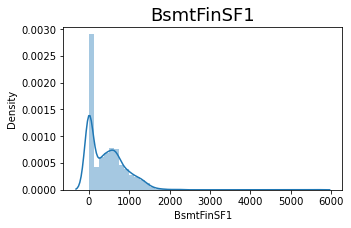

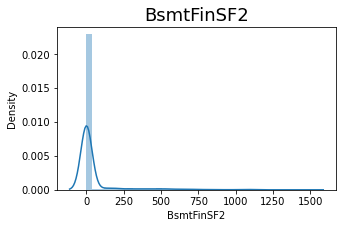

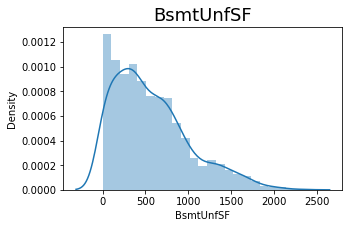

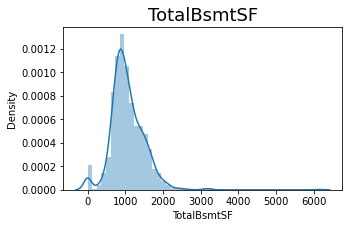

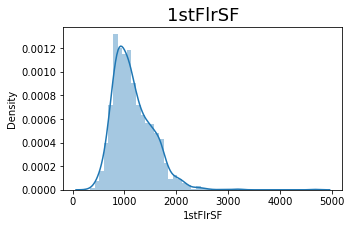

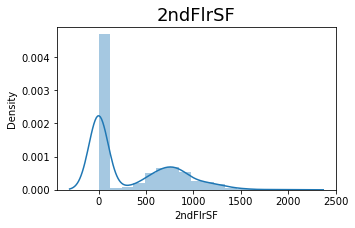

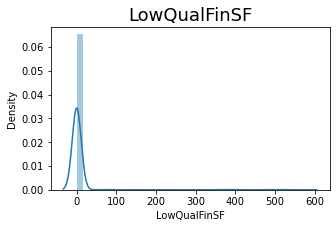

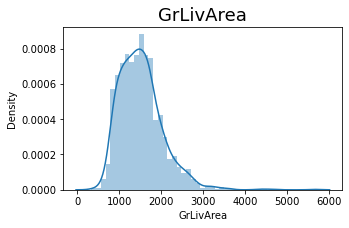

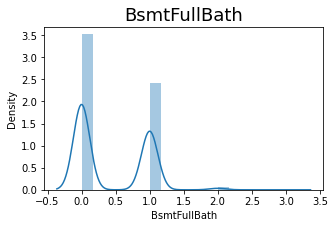

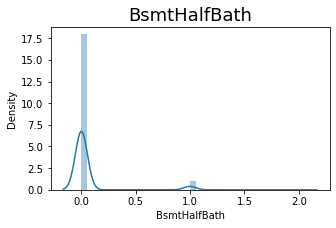

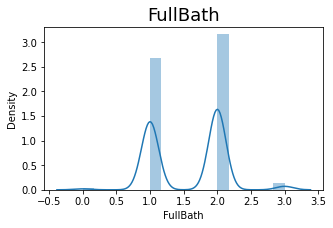

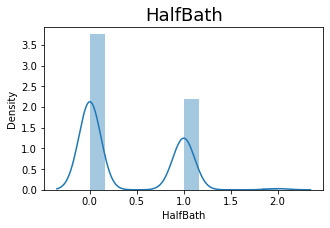

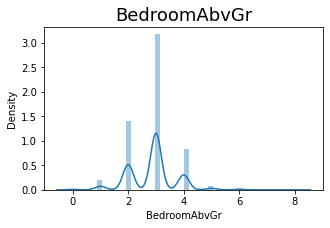

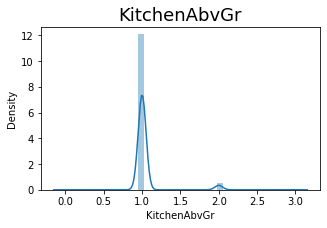

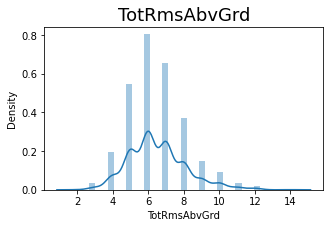

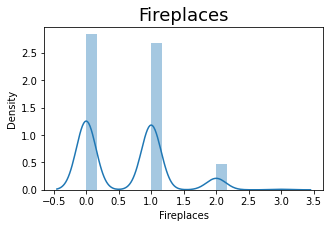

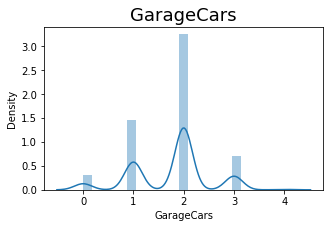

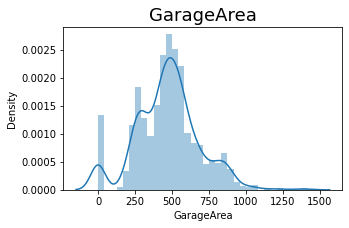

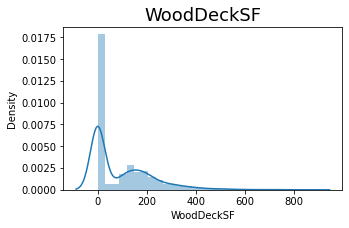

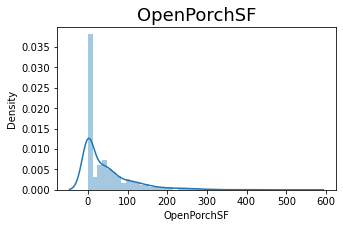

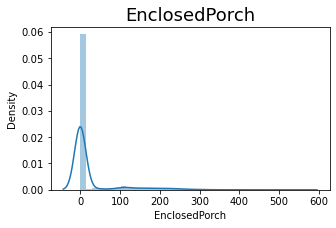

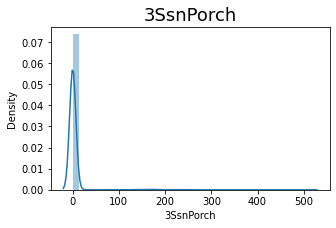

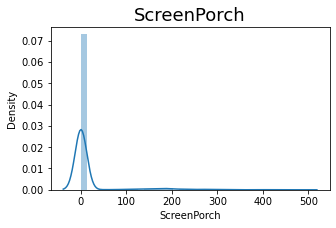

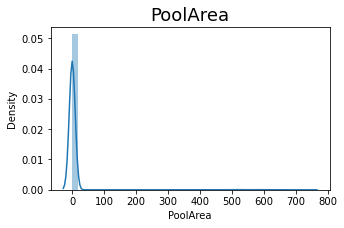

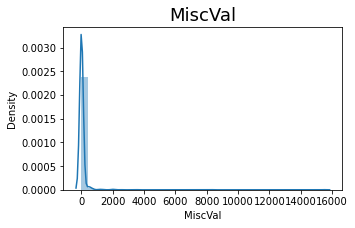

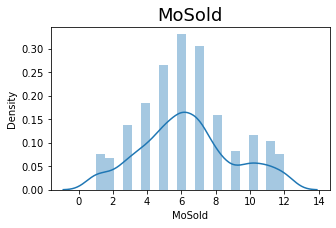

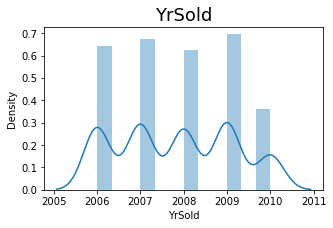

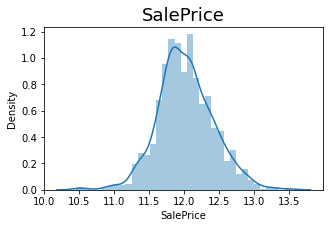

In [18]:
## View the distribution of all numeric variables using histograms

for col in df_num.columns:
    plt.figure(figsize=(5,3))
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_num[col])
    plt.show()  

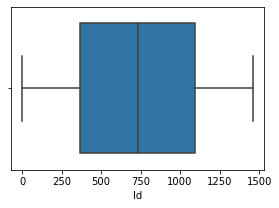

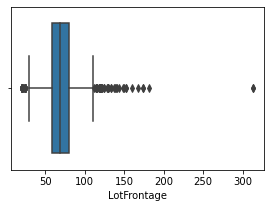

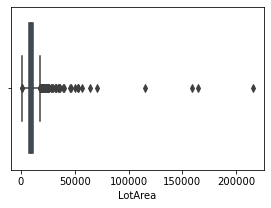

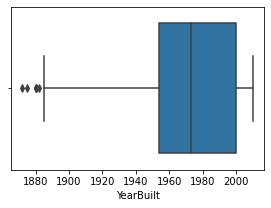

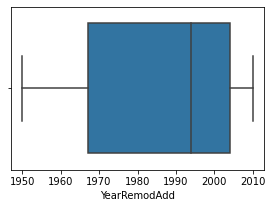

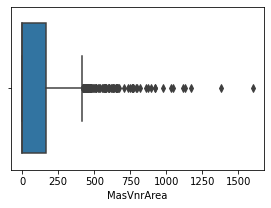

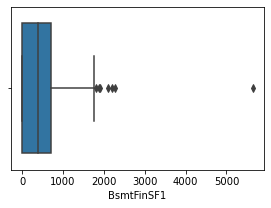

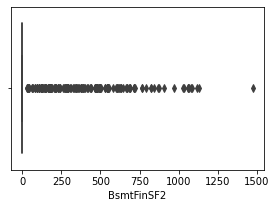

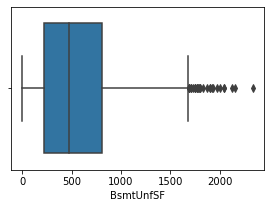

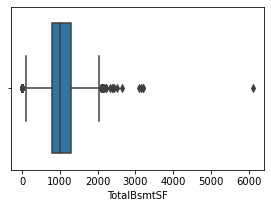

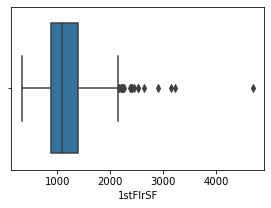

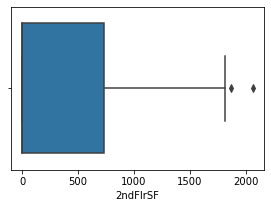

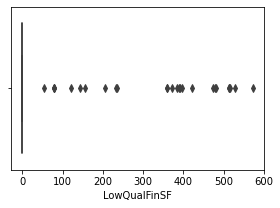

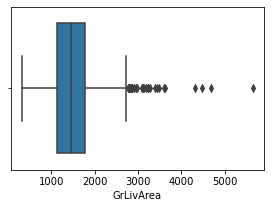

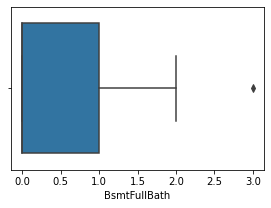

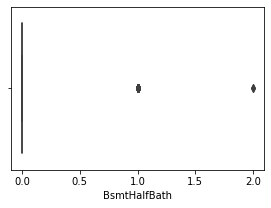

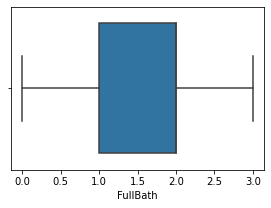

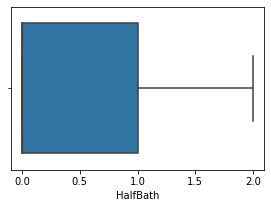

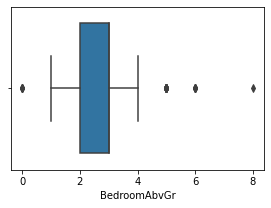

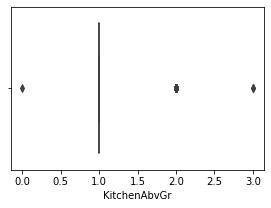

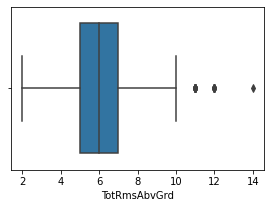

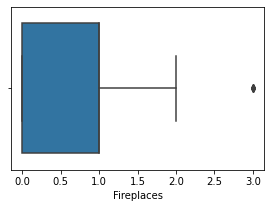

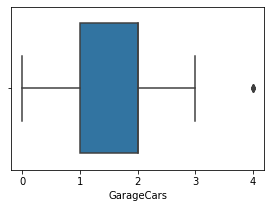

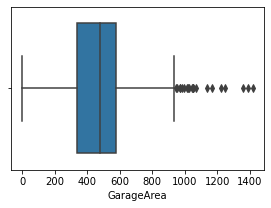

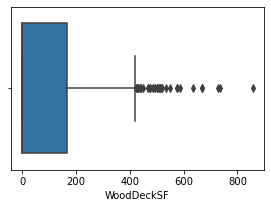

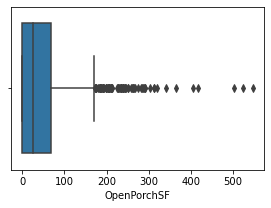

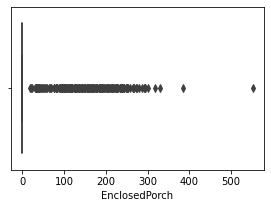

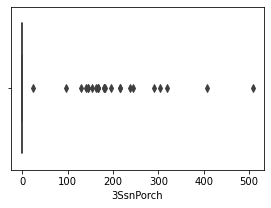

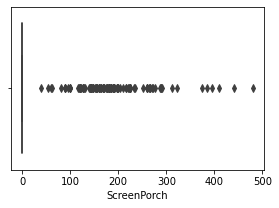

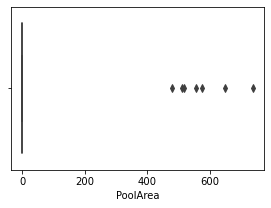

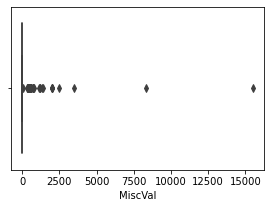

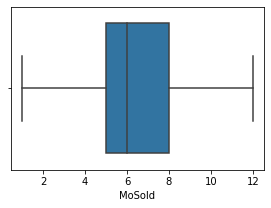

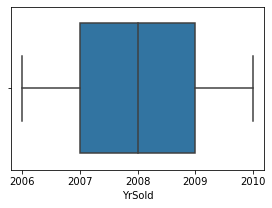

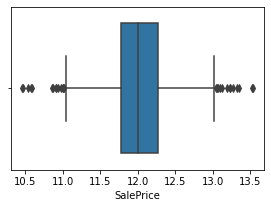

In [19]:
# View the spread of all numeric variables using boxplots

for col in df_num.columns:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])

#### Many of the numerical columns have distribution that are not normal.  
#### Most of the variables have outliers so, we'll have to perform outlier treatment.

## EDA on Categorical Columns

In [20]:
## Checking the levels of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[7 6 8 5 9 4 10 3 1 2] 

OverallCond
[5 8 6 7 4 2 3 9 1] 

RoofStyle
['Gab

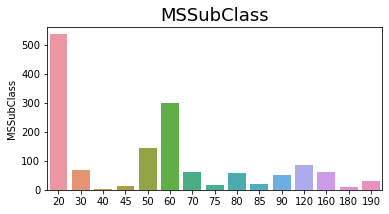

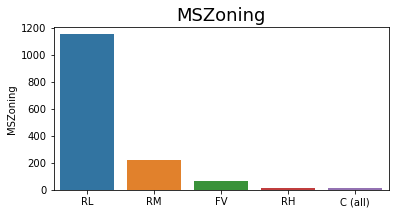

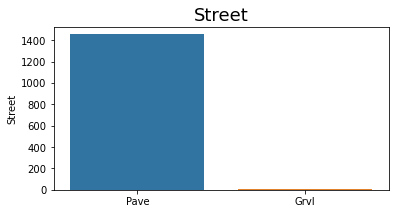

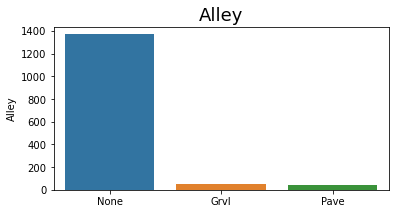

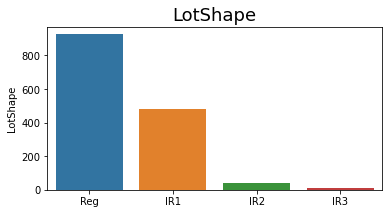

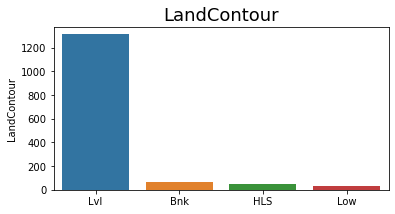

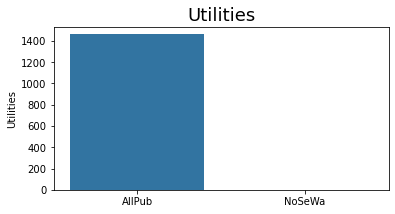

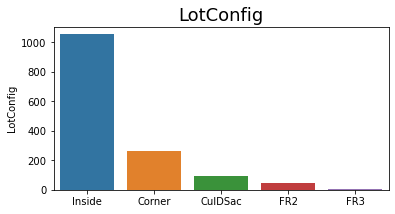

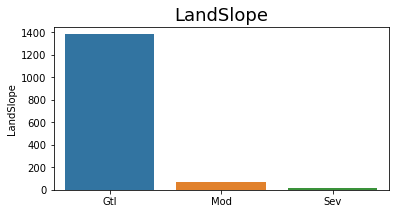

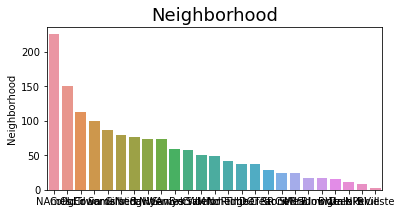

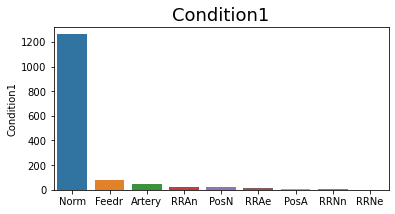

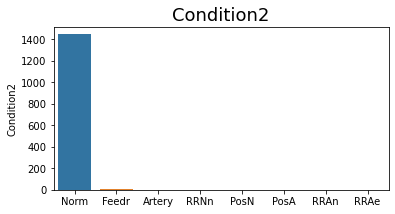

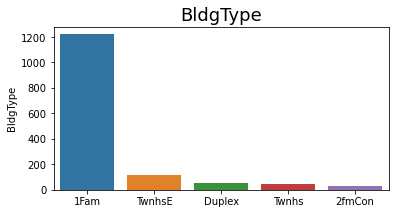

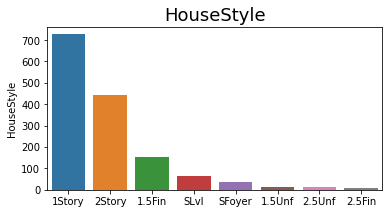

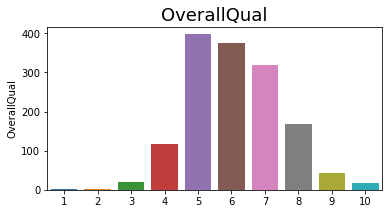

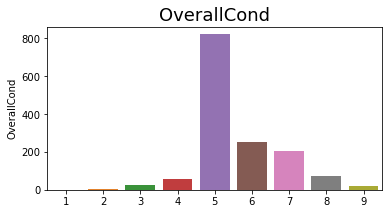

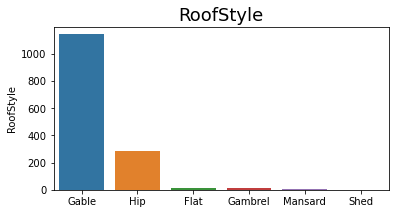

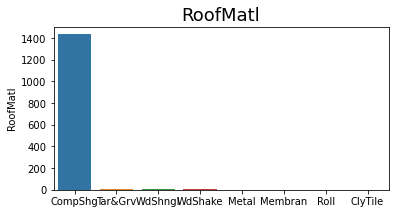

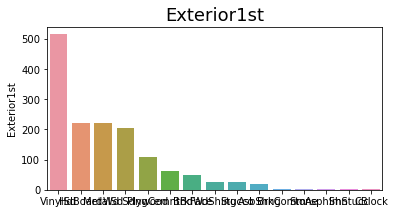

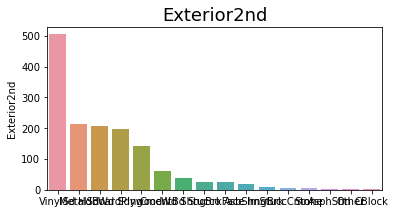

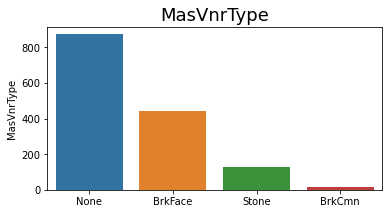

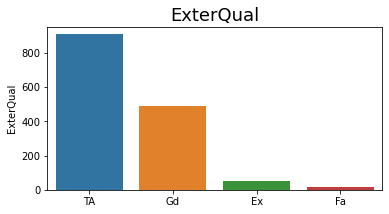

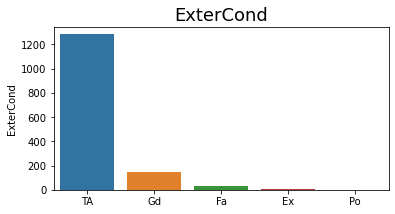

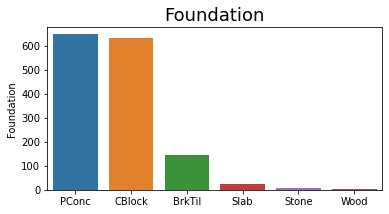

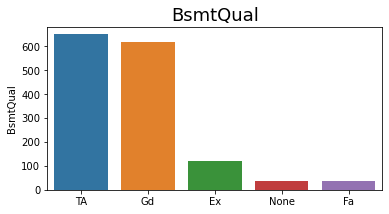

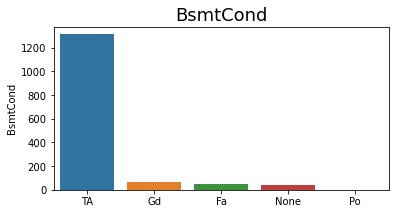

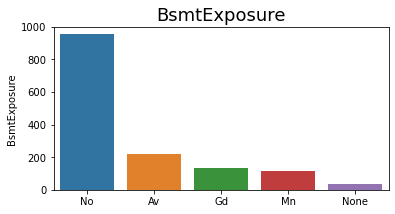

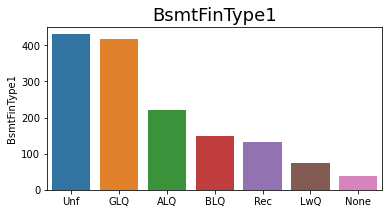

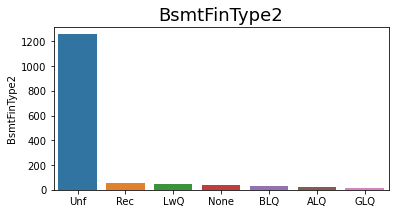

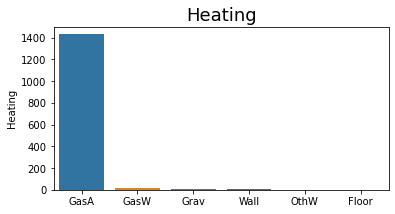

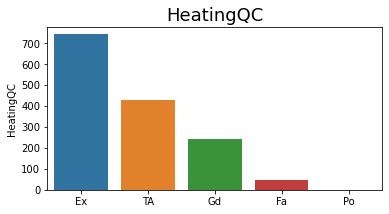

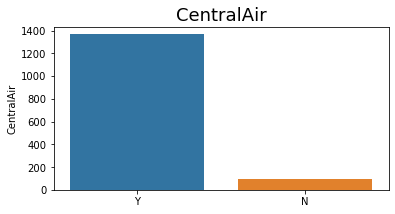

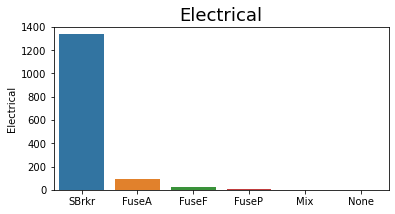

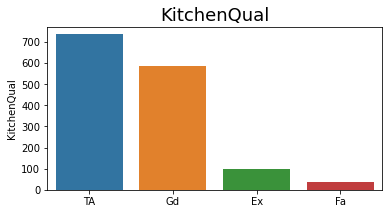

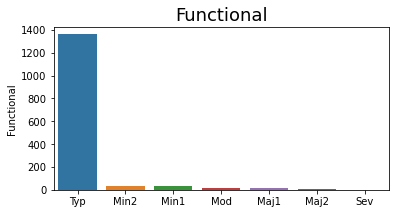

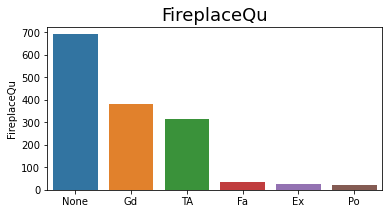

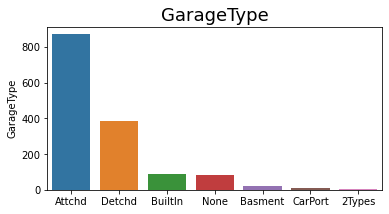

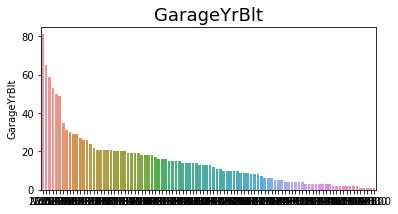

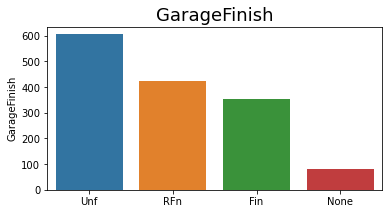

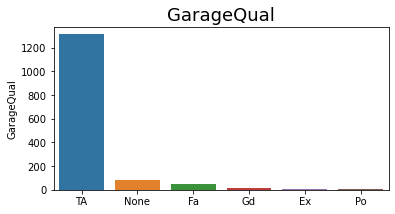

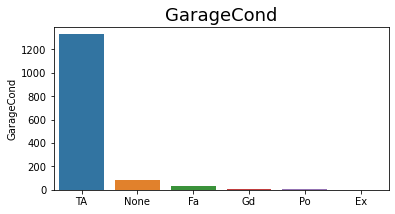

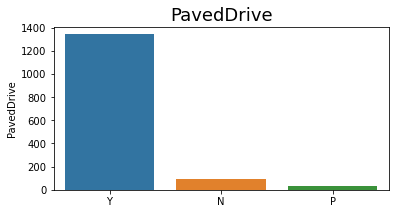

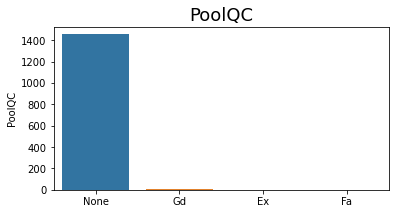

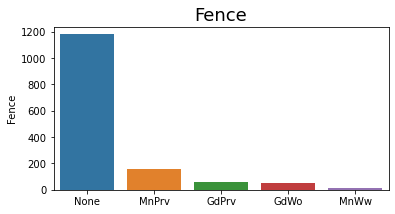

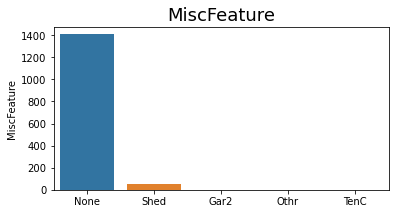

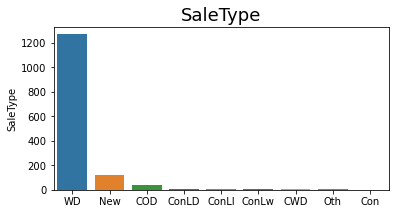

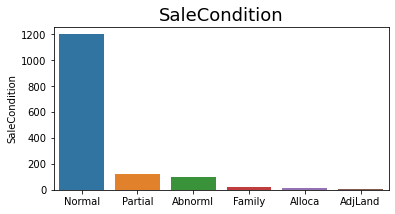

In [21]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(6,3))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts())
    plt.show()

#### We observe from above value counts and bar plots that no variable has a single level and we also have good amount of data in different levels so we will not remove any variable

## Bivariate Analysis

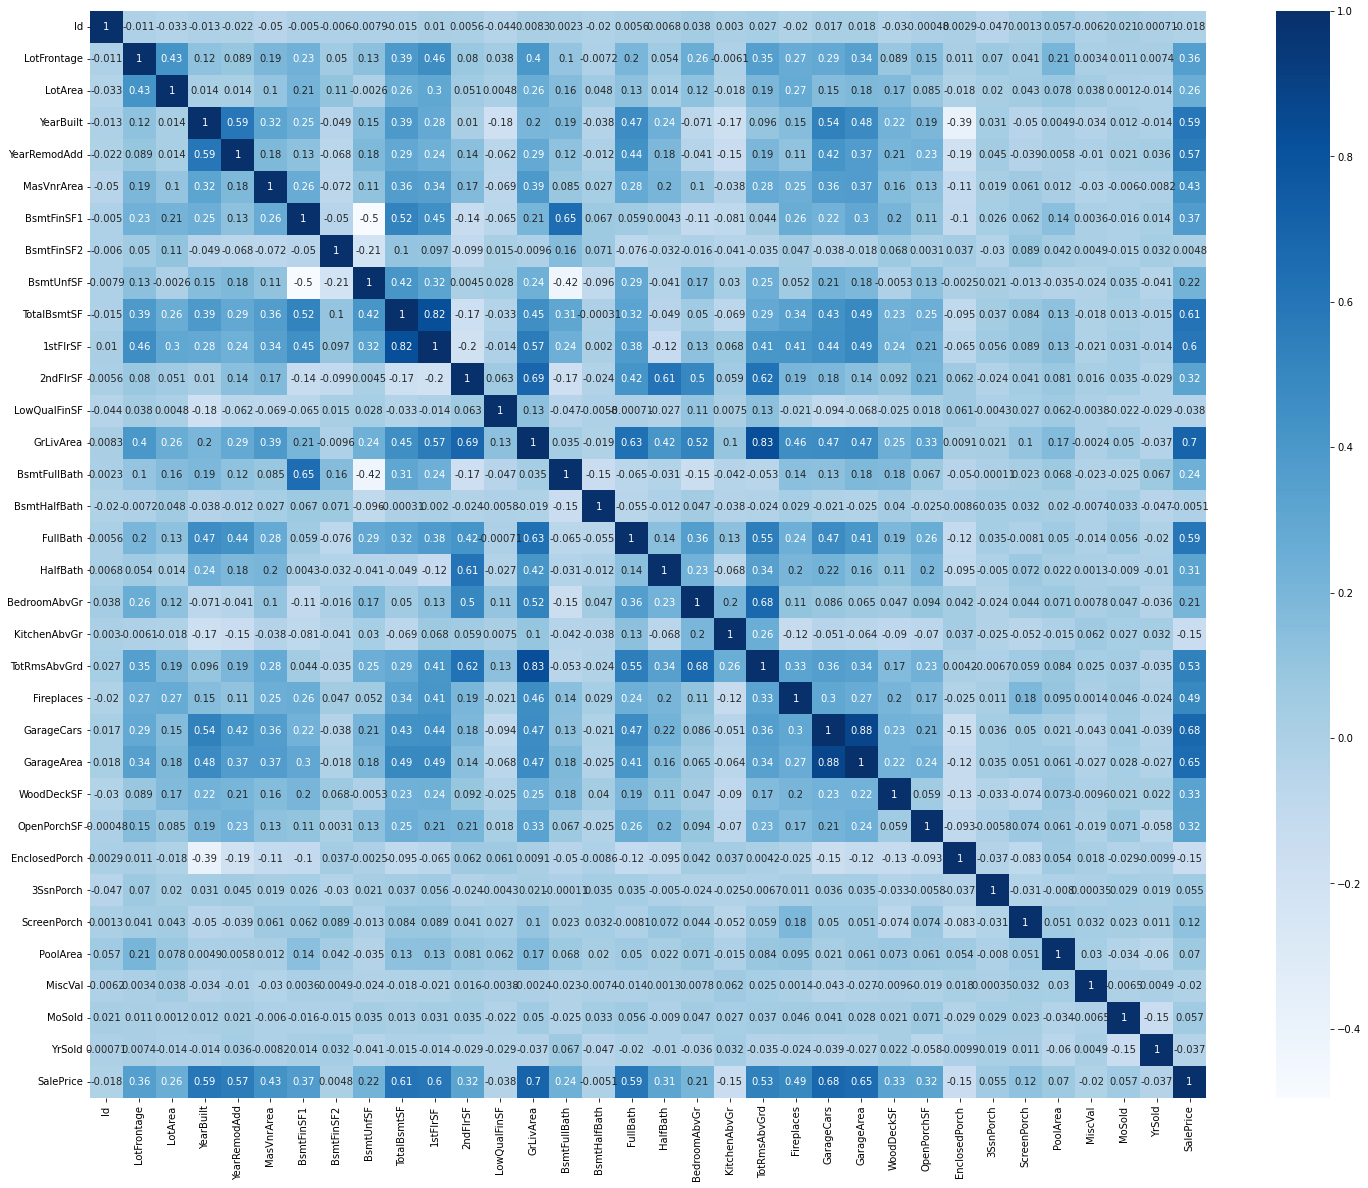

In [22]:
# Heatmap to detect correlation among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='Blues');

#### Many columns are highly correlated with each other.  
#### Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.  
#### As there is correlation among predictors in our data, it might be good to use Ridge Regression.

# Feature Engineering

In [23]:
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

In [24]:
## Dropping columns through which we created derived variable
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [25]:
## Checking the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,12.429216,8


# Data Preprocessing

## Missing Value Treatment

In [26]:
## View the missing value percentage in all features
df.isna().sum().sort_values(ascending = False)/len(df)*100

LotFrontage      17.739726
MasVnrArea        0.547945
Id                0.000000
KitchenAbvGr      0.000000
GarageYrBlt       0.000000
GarageType        0.000000
FireplaceQu       0.000000
Fireplaces        0.000000
Functional        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
BedroomAbvGr      0.000000
GarageCars        0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
GarageFinish      0.000000
GarageArea        0.000000
Electrical        0.000000
PoolQC            0.000000
SalePrice         0.000000
SaleCondition     0.000000
SaleType          0.000000
MoSold            0.000000
MiscVal           0.000000
MiscFeature       0.000000
Fence             0.000000
PoolArea          0.000000
GarageQual        0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
W

#### There are missing values only in two columns LotFrontage and MasVnrArea
#### As they are numerical columns, we will replace the missing values by mean value of the respective columns

In [27]:
## Replacing missing values in the above mentioned two columns by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [28]:
## Check for missing values again 
df.isna().sum().sort_values(ascending = False)/len(df)*100

Id               0.0
MSSubClass       0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
LotConfig        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1   

#### Now, our data is clean.

## Dummy Variable Creation

In [29]:
## Separate the categorical and numerical features again from original dataframe
## (as we have added one feature and removed two from original data)
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [30]:
## One hot encoding the categorical columns
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,Gar

In [31]:
## Check the dimensions
df_cat_dummy.shape

(1460, 352)

## Outlier treatment

<AxesSubplot:>

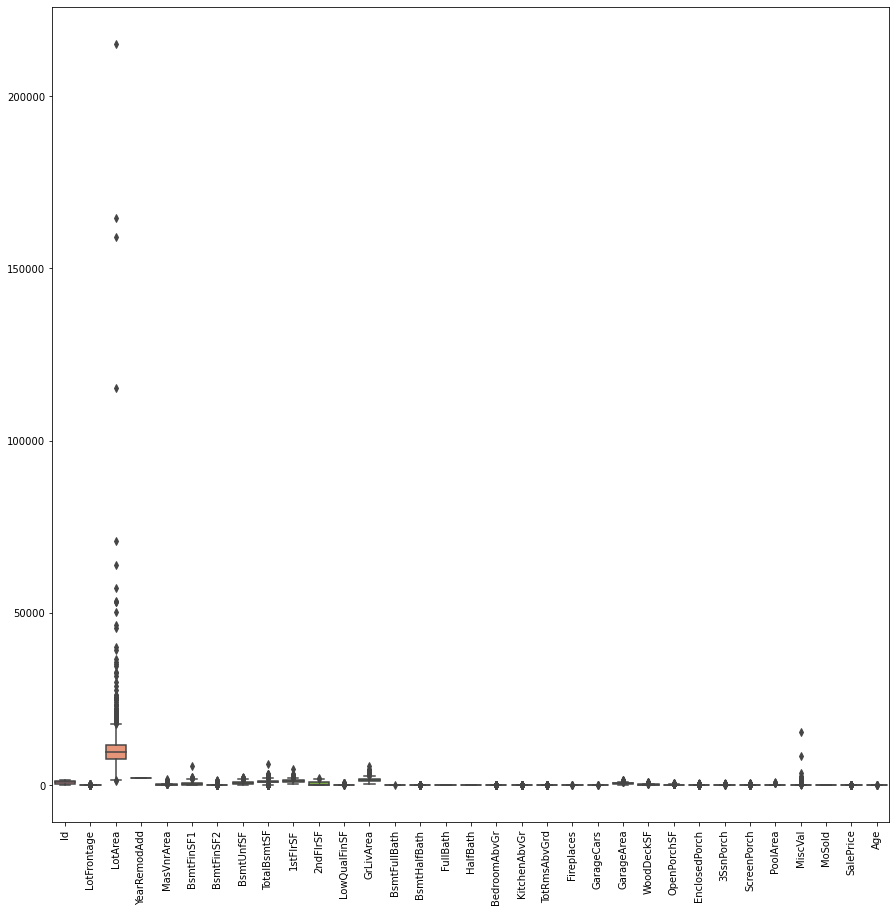

In [32]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

In [33]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

<AxesSubplot:>

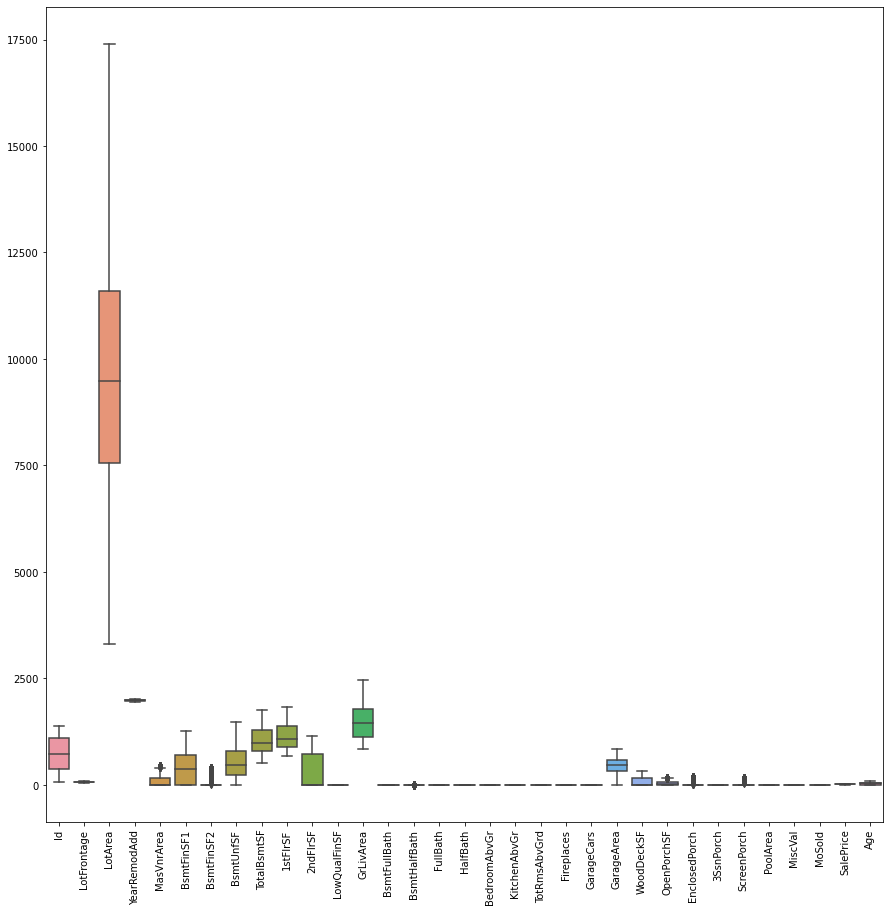

In [34]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

### So, we have removed outliers from all numerical columns

In [35]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_dummy], axis=1)

## View the first few rows of our dataframe
df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,

In [36]:
# Checking the shape of our dataframe
df.shape

(1460, 385)

#### Our dataframe is ready for model building

# Model Building

### Split the Data into Dependent and Independent variables

In [37]:
## Removing 'Id' as it is an identifier & not useful and 'SalePrice' as it's our target variable
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1908.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1

In [38]:
## Target variable creation
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

## Train - Test Split

In [39]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, shuffle=True)

In [40]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 383)
(1168,)


In [41]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 383)
(292,)


## Scaling numerical columns

In [42]:
## Create a list of numerical columns to be scaled
num_var = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_var

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [43]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

## Model 1: Ridge Regression

In [44]:
# This is a function to check all paramters of our regression model
def show_metrics(y_train, y_train_pred, y_test, y_pred):

    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
 
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 

    return metric

In [45]:
## Now to create a Ridge Regression model we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation using grid search
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
## Checking the best value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [47]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.04375424, 0.04375401, 0.04687877, 0.03750591, 0.03986979,
        0.04437809, 0.0481245 , 0.0375103 , 0.0437521 , 0.0406281 ,
        0.04375539, 0.0406323 , 0.04375243, 0.04687824, 0.03750148,
        0.04688053, 0.03438334, 0.03749967, 0.04062171, 0.04999843,
        0.04688473, 0.04687238, 0.05000148, 0.04062805, 0.04687934,
        0.03750281, 0.04063373, 0.03437862]),
 'std_fit_time': array([6.25164566e-03, 6.24961914e-03, 9.88181646e-03, 7.65810351e-03,
        7.57409571e-03, 1.12356646e-02, 1.25026477e-02, 7.65675972e-03,
        6.24950001e-03, 7.65416897e-03, 6.25496253e-03, 7.65253480e-03,
        6.24728290e-03, 9.88339961e-03, 7.65335180e-03, 5.00429182e-06,
        6.24833232e-03, 7.65531779e-03, 7.65654425e-03, 6.24697323e-03,
        8.49037985e-06, 5.84003864e-07, 1.53131465e-02, 7.65267308e-03,
        2.18722247e-06, 7.65323466e-03, 7.65935003e-03, 6.24700001e-03]),
 'mean_score_time': array([0.00937738, 0.00937462, 0.00624704, 0.01249905, 

### Thus, we get optimum value of alpha as 10. Now we will build a ridge regression model using this value.

In [48]:
# Create a ridge regreesion instance with best alpha value which is 10
ridge = Ridge(alpha=10)

In [49]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [50]:
## View the coefficients of ridge regression model
ridge.coef_

array([ 3.79155533e-03,  2.21736410e-02,  2.53232117e-02, -3.36049046e-03,
        1.12826630e-02,  1.50619841e-03, -1.25689965e-02,  5.52626064e-02,
        1.98925671e-02,  3.97566506e-02,  0.00000000e+00,  7.54213542e-02,
        1.00073698e-02, -8.35576161e-04,  1.19426188e-02,  1.11047896e-02,
        9.27438968e-04,  0.00000000e+00, -2.75269254e-03,  1.15110002e-02,
        9.81034823e-03,  2.26712122e-02,  1.21148712e-02,  7.66405023e-03,
        2.94145262e-03,  0.00000000e+00,  7.04808026e-03,  0.00000000e+00,
        0.00000000e+00,  1.43754925e-03, -5.12719735e-02, -3.77863415e-02,
       -2.74055143e-03,  9.25755611e-04,  2.29439928e-03, -6.90781355e-03,
        3.95812407e-02,  1.54125234e-02,  5.68017641e-03,  1.24533357e-02,
       -2.62502213e-02,  3.14221646e-03, -4.85314407e-02, -2.42541532e-02,
       -2.01450118e-02,  4.49925992e-02,  2.37417732e-02,  1.73119413e-02,
       -2.45785626e-02, -5.72263255e-03, -4.41434223e-03,  1.38996729e-02,
        3.78804143e-03, -

In [51]:
## Getting predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [52]:
## Check metrics using the function we created above
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.91
RSS (Train) = 8.30
RSS (Test) = 3.20
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.10


### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [53]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043754,6.251646e-03,0.009377,0.007657,0.0001,{'alpha': 0.0001},-0.111552,-0.090883,-0.102995,-0.080624,-0.087857,-0.094782,0.011066,27,-0.044832,-0.049854,-0.049622,-0.051926,-0.050160,-0.049279,0.002367
1,0.043754,6.249619e-03,0.009375,0.007654,0.001,{'alpha': 0.001},-0.111031,-0.089533,-0.102931,-0.080791,-0.087690,-0.094395,0.010984,26,-0.044850,-0.049888,-0.049624,-0.051956,-0.050165,-0.049297,0.002369
2,0.046879,9.881816e-03,0.006247,0.007651,0.01,{'alpha': 0.01},-0.109837,-0.086322,-0.102348,-0.081079,-0.086367,-0.093190,0.010967,25,-0.044906,-0.050069,-0.049642,-0.052051,-0.050241,-0.049382,0.002385
3,0.037506,7.658104e-03,0.012499,0.006250,0.05,{'alpha': 0.05},-0.107922,-0.084288,-0.100453,-0.080539,-0.084063,-0.091453,0.010745,23,-0.045066,-0.050506,-0.049722,-0.052224,-0.050696,-0.049643,0.002428
4,0.039870,7.574096e-03,0.012256,0.006148,0.1,{'alpha': 0.1},-0.106172,-0.083258,-0.098772,-0.079903,-0.082419,-0.090105,0.010424,22,-0.045281,-0.050979,-0.049807,-0.052435,-0.051137,-0.049928,0.002468
5,0.044378,1.123566e-02,0.010876,0.006288,0.2,{'alpha': 0.2},-0.103582,-0.081896,-0.096322,-0.078869,-0.080524,-0.088239,0.009882,21,-0.045798,-0.051696,-0.049993,-0.052861,-0.051850,-0.050440,0.002497
6,0.048125,1.250265e-02,0.012504,0.006252,0.3,{'alpha': 0.3},-0.101772,-0.080833,-0.094544,-0.077989,-0.079532,-0.086934,0.009488,20,-0.046254,-0.052263,-0.050176,-0.053188,-0.052363,-0.050849,0.002503
7,0.037510,7.656760e-03,0.009376,0.007655,0.4,{'alpha': 0.4},-0.100324,-0.079994,-0.093228,-0.077249,-0.078763,-0.085911,0.009191,19,-0.046642,-0.052718,-0.050337,-0.053484,-0.052765,-0.051189,0.002510
8,0.043752,6.249500e-03,0.006251,0.007655,0.5,{'alpha': 0.5},-0.099181,-0.079266,-0.092107,-0.076591,-0.078238,-0.085077,0.008954,18,-0.047010,-0.053086,-0.050505,-0.053754,-0.053100,-0.051491,0.002502
9,0.040628,7.654169e-03,0.012498,0.006249,0.6,{'alpha': 0.6},-0.098202,-0.078711,-0.091117,-0.075996,-0.077770,-0.084359,0.008747,17,-0.047339,-0.053399,-0.050662,-0.053998,-0.053386,-0.051757,0.002494


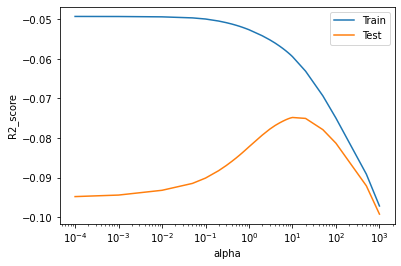

In [54]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error. From the above graph as well, it is apparent that the optimal value of alpha is 10.

## Model 2: Lasso

In [55]:
## Now to create a Lasso model we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
## Checking the best value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [57]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.38135529, 0.13267174, 0.07828054, 0.06880255, 0.05905871,
        0.04062285, 0.02812753, 0.03125381, 0.02500196, 0.03425307,
        0.02759314, 0.03089495, 0.02644377, 0.03125124, 0.02187843,
        0.02500591, 0.02500296, 0.02791524, 0.02751036, 0.02541895,
        0.02813616, 0.02812772, 0.02500348, 0.03125439, 0.03125343,
        0.02812886, 0.02812538, 0.02187657]),
 'std_fit_time': array([9.13389503e-02, 2.16643400e-02, 1.10102213e-02, 6.77225908e-03,
        6.55191138e-03, 7.65027843e-03, 6.24959478e-03, 3.50402318e-06,
        7.65576626e-03, 3.66855780e-03, 5.98988405e-03, 4.43030258e-04,
        6.31169179e-03, 7.23379414e-06, 7.65633065e-03, 7.65559007e-03,
        7.65677846e-03, 6.15989278e-03, 5.99312508e-03, 6.80883544e-03,
        6.24533253e-03, 6.25124039e-03, 7.65389659e-03, 1.08316581e-06,
        7.62939453e-07, 6.24930878e-03, 6.24959501e-03, 7.65522000e-03]),
 'mean_score_time': array([0.00945225, 0.01728911, 0.01808171, 0.01578074, 

### Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [58]:
# Create a ridge regreesion instance with best alpha value which is 0.001
lasso = Lasso(alpha=0.001)

In [59]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [60]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 1.75048312e-03,  2.12845428e-02,  2.90712426e-02,  0.00000000e+00,
        2.36536649e-02,  2.81850827e-03, -4.71727519e-04,  5.44736653e-02,
        0.00000000e+00,  1.33754616e-02,  0.00000000e+00,  1.01412811e-01,
        1.07192159e-02,  0.00000000e+00,  3.89122533e-03,  9.38482193e-03,
       -0.00000000e+00,  0.00000000e+00, -8.31486008e-04,  1.83144321e-02,
        1.17535022e-02,  2.34970850e-02,  1.29992259e-02,  7.06353296e-03,
        3.18051308e-03,  0.00000000e+00,  6.63004404e-03,  0.00000000e+00,
        0.00000000e+00,  9.19142203e-05, -5.74628284e-02, -1.29884258e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.02069650e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64550357e-02,  0.00000000e+00, -3.45457467e-02, -0.00000000e+00,
       -0.00000000e+00,  2.04661283e-02,  0.00000000e+00,  0.00000000e+00,
       -4.47373995e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [61]:
## Getting predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [62]:
## Check metrics using the function we created above
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.91
RSS (Train) = 10.94
RSS (Test) = 3.31
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


### Now, we will plot R2 Score against different values of alpha for both train and test sets

In [63]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.381355,9.133895e-02,0.009452,0.007719,0.0001,{'alpha': 0.0001},-0.087654,-0.073289,-0.080105,-0.068108,-0.071259,-0.076083,0.006996,2,-0.050130,-0.054819,-0.053418,-0.056255,-0.055237,-0.053972,0.002126
1,0.132672,2.166434e-02,0.017289,0.003330,0.001,{'alpha': 0.001},-0.082694,-0.071269,-0.076328,-0.068669,-0.075590,-0.074910,0.004802,1,-0.066204,-0.070218,-0.067416,-0.069607,-0.069200,-0.068529,0.001491
2,0.078281,1.101022e-02,0.018082,0.009052,0.01,{'alpha': 0.01},-0.102418,-0.092666,-0.098646,-0.096233,-0.102234,-0.098439,0.003701,3,-0.095744,-0.098162,-0.096481,-0.097010,-0.096715,-0.096822,0.000790
3,0.068803,6.772259e-03,0.015781,0.000189,0.05,{'alpha': 0.05},-0.128553,-0.117941,-0.118241,-0.123961,-0.121273,-0.121994,0.003948,4,-0.118541,-0.123070,-0.119778,-0.121155,-0.120986,-0.120706,0.001511
4,0.059059,6.551911e-03,0.012493,0.006246,0.1,{'alpha': 0.1},-0.169782,-0.163453,-0.155389,-0.163958,-0.157864,-0.162089,0.005045,5,-0.158598,-0.162034,-0.159643,-0.160437,-0.161505,-0.160444,0.001241
5,0.040623,7.650278e-03,0.006252,0.007657,0.2,{'alpha': 0.2},-0.259480,-0.263652,-0.242222,-0.256275,-0.250066,-0.254339,0.007510,6,-0.253174,-0.253139,-0.252550,-0.252344,-0.253672,-0.252976,0.000476
6,0.028128,6.249595e-03,0.015626,0.000004,0.3,{'alpha': 0.3},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980
7,0.031254,3.504023e-06,0.009375,0.007655,0.4,{'alpha': 0.4},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980
8,0.025002,7.655766e-03,0.012500,0.006250,0.5,{'alpha': 0.5},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980
9,0.034253,3.668558e-03,0.012089,0.003975,0.6,{'alpha': 0.6},-0.296031,-0.300690,-0.279976,-0.293363,-0.287688,-0.291549,0.007152,7,-0.290076,-0.288160,-0.293778,-0.289557,-0.292109,-0.290736,0.001980


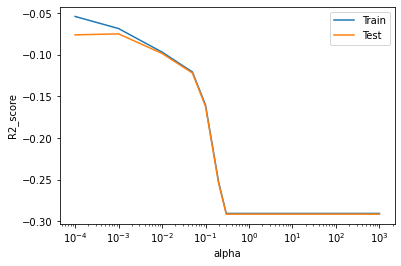

In [64]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### As the value of alpha increases, we see a decrease in both train and test error. However, after a error value of approximately 0.05, error remains constant.

# Comparing the two models

In [65]:
## Setting float display options to 3 decimal points
pd.options.display.float_format = "{:,.3f}".format

In [66]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.943,0.925
R2 Score (Test),0.911,0.908
RSS (Train),8.297,10.940
RSS (Test),3.199,3.310
MSE (Train),0.007,0.009
MSE (Test),0.011,0.011
RMSE (Train),0.084,0.097
RMSE (Test),0.105,0.106


### The R2 score on test data is nearly 0.91 for both Ridge Regression and Lasso Regression models.

In [67]:
## Create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [68]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [69]:
## Observing the beta coefficients for both types of models
betas 

,Ridge,Lasso
LotFrontage,0.004,0.002
LotArea,0.022,0.021
YearRemodAdd,0.025,0.029
MasVnrArea,-0.003,0.000
BsmtFinSF1,0.011,0.024
BsmtFinSF2,0.002,0.003
BsmtUnfSF,-0.013,-0.000
TotalBsmtSF,0.055,0.054
1stFlrSF,0.020,0.000
2ndFlrSF,0.040,0.013


In [70]:
## View the number of features removed by Lasso
betas[betas['Lasso']==0].shape[0]

305

In [71]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
MasVnrArea,-0.003,0.000
1stFlrSF,0.020,0.000
LowQualFinSF,0.000,0.000
BsmtHalfBath,-0.001,0.000
BedroomAbvGr,0.001,-0.000
KitchenAbvGr,0.000,0.000
3SsnPorch,0.000,0.000
PoolArea,0.000,0.000
MiscVal,0.000,0.000
MSSubClass_40,-0.003,0.000


### The above 305 features out of 383 (from X_train) have been removed by Lasso. In this way, lasso performs feature selection
### Below are the features selected by Lasso

In [72]:
## Number of features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso'].shape[0]

78

In [73]:
## View the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.002
LotArea                  0.021
YearRemodAdd             0.029
BsmtFinSF1               0.024
BsmtFinSF2               0.003
BsmtUnfSF               -0.000
TotalBsmtSF              0.054
2ndFlrSF                 0.013
GrLivArea                0.101
BsmtFullBath             0.011
FullBath                 0.004
HalfBath                 0.009
TotRmsAbvGrd            -0.001
Fireplaces               0.018
GarageCars               0.012
GarageArea               0.023
WoodDeckSF               0.013
OpenPorchSF              0.007
EnclosedPorch            0.003
ScreenPorch              0.007
MoSold                   0.000
Age                     -0.057
MSSubClass_30           -0.013
MSSubClass_70            0.020
MSSubClass_90           -0.016
MSSubClass_160          -0.035
MSZoning_FV              0.020
MSZoning_RM             -0.045
LotShape_Reg            -0.006
LotConfig_CulDSac        0.013
Neighborhood_BrkSide     0.030
Neighborhood_ClearCr     0.023
Neighbor

# Inferences for 'Surprise Housing' Case Study

### Top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [74]:
# To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas, since we took a log of our target variable
## View the top 10 coefficients of Ridge regression

ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor   1.094
OverallCond_9          1.082
OverallQual_9          1.082
GrLivArea              1.078
OverallQual_8          1.078
Functional_Typ         1.063
TotalBsmtSF            1.057
Exterior1st_BrkFace    1.055
OverallCond_7          1.046
MSZoning_FV            1.046
Name: Ridge, dtype: float64

In [75]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas, since we took a log of our target variable
## View the top 10 coefficients of Lasso regression

lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.141
OverallQual_8          1.115
Neighborhood_Crawfor   1.110
GrLivArea              1.107
Functional_Typ         1.061
TotalBsmtSF            1.056
OverallQual_7          1.054
Exterior1st_BrkFace    1.046
Condition1_Norm        1.043
CentralAir_Y           1.039
Name: Lasso, dtype: float64

## Inferences:
### The variables significant in predicting the price of a house are :
Neighborhood_Crawfor, OverallCond_9, OverallQual_8, OverallQual_9, GrLivArea, Functional_Typ, Exterior1st_BrkFace, TotalBsmtSF, OverallCond_7, MSZoning_FV, OverallQual_7, Condition1_Norm, CentralAir_Y       


### How well those variables describe the price of a house :
Few examples of some of those variable interpretations are - 
- Neighborhood_Crawfor : if Crawford is a nearby location, then the price of house will increase by nearly 1.1 times.
- OverallCond_9 : if the overall condition of the house is Excellent, the price of house will increase by nearly 1.08 times.
- OverallQual_8 & OverallQual_9 : if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by nearly 1.08 to 1.14 times.
- GrLivArea :an increase of 1 square foot of house area above ground, the price will increase by nearly 1.07 to 1.11 times.
- Functional_Typ : if the home functionality is typical, then the price of house will increase by nearly 1.06 times.
- Exterior1st_BrkFace : if the exterior covering on the house is Brick Face, the price of house will increase by nearly 1.05 times.

We can interpret the interaction of other variables in a similar manner.

### Optimal value of lambda for Ridge Regression = 10


### Optimal value of lambda for Lasso Regression = 0.001

# ---------------------------------------------------------------------------------------------------------------

# Codes for Subjective questions

## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

## Answer:

- Optimal value of lambda for Ridge Regression is 10


- Optimal value of lambda for Lasso Regression is 0.001

In [76]:
ridge_alpha = 10
lasso_alpha = 0.001

In [77]:
## Let us build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=ridge_alpha*2)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [78]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [79]:
## Check metrics
ridge_metrics_q1 = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.91
RSS (Train) = 9.12
RSS (Test) = 3.20
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [80]:
## Now we will build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=lasso_alpha*2)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [81]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [82]:
## Check metrics
lasso_metrics_q1 = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.89
RSS (Train) = 13.16
RSS (Test) = 3.90
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.12


In [83]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics_q1,
            'Lasso Regression' : lasso_metrics_q1
        }

final_metric_q1 = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric_q1.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.937,0.910
R2 Score (Test),0.911,0.892
RSS (Train),9.123,13.163
RSS (Test),3.198,3.902
MSE (Train),0.008,0.011
MSE (Test),0.011,0.013
RMSE (Train),0.088,0.106
RMSE (Test),0.105,0.116


### Changes in Ridge Regression metrics:
- R2 score of train set decreased from 0.943 to 0.937
- R2 score of test set remained same at 0.911

### Changes in Lasso Regression metrics:
- R2 score of train set decreased from 0.925 to 0.910
- R2 score of test set decreased from 0.93 to 0.892

In [84]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas_q1 = pd.DataFrame(index=X.columns)
betas_q1.rows = X.columns

In [85]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas_q1['Ridge'] = ridge.coef_
betas_q1['Lasso'] = lasso.coef_

In [86]:
## View the betas/coefficients
betas_q1 

,Ridge,Lasso
LotFrontage,0.005,0.003
LotArea,0.022,0.023
YearRemodAdd,0.028,0.038
MasVnrArea,-0.002,0.000
BsmtFinSF1,0.015,0.026
BsmtFinSF2,0.003,0.002
BsmtUnfSF,-0.010,-0.000
TotalBsmtSF,0.053,0.056
1stFlrSF,0.022,0.000
2ndFlrSF,0.038,0.013


### Now, we look at the most important predictor variables after the change is implemented.

In [87]:
# To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas, since we took a log of our target variable
# View the top 10 coefficients of Ridge regression

ridge_coeffs = np.exp(betas_q1['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

Neighborhood_Crawfor   1.075
GrLivArea              1.075
OverallQual_8          1.070
OverallQual_9          1.065
Functional_Typ         1.056
TotalBsmtSF            1.054
OverallCond_9          1.054
Exterior1st_BrkFace    1.045
OverallCond_7          1.044
SaleCondition_Normal   1.042
Name: Ridge, dtype: float64

In [88]:
# To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas, since we took a log of our target variable
## View the top 10 coefficients of Lasso regression
lasso_coeffs = np.exp(betas_q1['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.107
OverallQual_8          1.094
OverallQual_9          1.087
Neighborhood_Crawfor   1.081
TotalBsmtSF            1.058
Functional_Typ         1.057
OverallQual_7          1.043
YearRemodAdd           1.038
Condition1_Norm        1.035
CentralAir_Y           1.031
Name: Lasso, dtype: float64

### The most important predictor variables after we double the alpha values are:-
- Neighborhood_Crawfor
- GrLivArea
- OverallQual_8
- OverallQual_9
- Functional_Typ
- TotalBsmtSF
- OverallCond_9
- Exterior1st_BrkFace
- OverallCond_7
- SaleCondition_Normal
- OverallQual_7
- YearRemodAdd
- Condition1_Norm
- CentralAir_Y

## Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

## Answer

Answered in PDF

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

## Answer

- Here, we will drop the top 5 features in Lasso model and build the model again.

Top 5 Lasso predictors were: OverallQual_9, OverallQual_8, Neighborhood_Crawfor, GrLivArea and Functional_Typ

In [89]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'OverallQual_8', 'Neighborhood_Crawfor', 'GrLivArea', 'Functional_Typ']

In [90]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [91]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

### Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [93]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [94]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [95]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [96]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.90
RSS (Train) = 12.19
RSS (Test) = 3.64
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


### Now, we will find the top 5 predictors

In [97]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.916
R2 Score (Test),0.899
RSS (Train),12.193
RSS (Test),3.642
MSE (Train),0.010
MSE (Test),0.012
RMSE (Train),0.102
RMSE (Test),0.112


In [98]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas_q3 = pd.DataFrame(index=X_train_dropped.columns)
betas_q3.rows = X_train_dropped.columns

In [99]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas_q3['Lasso'] = lasso.coef_

### Now, we will look at the top 5 features significant in predicting the value of a house according to the new lasso model

In [100]:
## View the top 5 coefficients of Lasso in descending order
betas_q3['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.098
1stFlrSF               0.066
TotalBsmtSF            0.061
Exterior1st_BrkFace    0.056
Neighborhood_Somerst   0.054
Name: Lasso, dtype: float64

### After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-

- 2ndFlrSF               
- 1stFlrSF               
- TotalBsmtSF            
- Exterior1st_BrkFace    
- Neighborhood_Somerst   

## Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

## Answer

Answered in PDF



